In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns

In [2]:
summary_df = pd.read_csv('../data/processed/modeling_summary_metrics.csv')

In [3]:
print("Overall Performance Summary")
print(summary_df.groupby('Pollutant')[['Improvement', 'RIA']].mean())

Overall Performance Summary
           Improvement       RIA
Pollutant                       
NO2          53.940462  0.847155
O3           29.833456  0.874775


In [4]:
pred_files = sorted(glob.glob('../data/predictions/*_predictions.csv'))
target_site_file = pred_files[0] 
site_name = os.path.basename(target_site_file).replace('_predictions.csv', '')
print(f"Evaluation for {site_name}")

Evaluation for site_1


In [5]:
df = pd.read_csv(target_site_file, parse_dates=['timestamp'], index_col='timestamp')

In [6]:
df

,O3_forecast,NO2_forecast,T_forecast,q_forecast,u_forecast,v_forecast,w_forecast,O3_target,NO2_target,hour,...,hour_sin,hour_cos,month_sin,month_cos,O3_target_lag_1,O3_target_lag_24,NO2_target_lag_1,NO2_target_lag_24,O3_target_pred,NO2_target_pred
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-11 00:00:00,0.03,131.86,18.49,21.74,-1.94,1.65,0.50,2.17,34.78,0,...,0.000000,1.000000,8.660254e-01,-0.5,-999.00,-999.0,-999.00,-999.0,12.042222,19.975151
2023-04-11 01:00:00,0.02,158.92,15.27,21.75,-2.36,1.54,0.27,2.25,33.38,1,...,0.258819,0.965926,8.660254e-01,-0.5,2.17,-999.0,34.78,-999.0,1.860158,31.869110
2023-04-11 02:00:00,0.02,185.97,13.80,21.76,-2.78,1.43,0.04,2.28,40.53,2,...,0.500000,0.866025,8.660254e-01,-0.5,2.25,-999.0,33.38,-999.0,5.617439,32.888880
2023-04-11 03:00:00,0.01,213.03,14.68,21.76,-3.21,1.32,-0.19,3.70,49.95,3,...,0.707107,0.707107,8.660254e-01,-0.5,2.28,-999.0,40.53,-999.0,8.835823,36.952103
2023-04-11 04:00:00,0.08,210.78,14.39,21.68,-2.84,1.16,-0.66,14.25,36.95,4,...,0.866025,0.500000,8.660254e-01,-0.5,3.70,-999.0,49.95,-999.0,9.917695,41.495690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28 20:00:00,58.71,19.79,26.66,10.16,3.95,0.93,-0.29,40.20,64.50,20,...,-0.866025,0.500000,1.224647e-16,-1.0,46.67,-999.0,52.38,-999.0,38.542730,47.249836
2024-06-28 21:00:00,59.50,19.57,27.69,10.62,3.85,1.04,-0.38,116.60,66.00,21,...,-0.707107,0.707107,1.224647e-16,-1.0,40.20,-999.0,64.50,-999.0,30.442343,54.088940
2024-06-28 22:00:00,60.04,19.92,26.20,10.50,3.78,0.92,-0.24,90.23,66.17,22,...,-0.500000,0.866025,1.224647e-16,-1.0,116.60,-999.0,66.00,-999.0,50.609997,53.929195


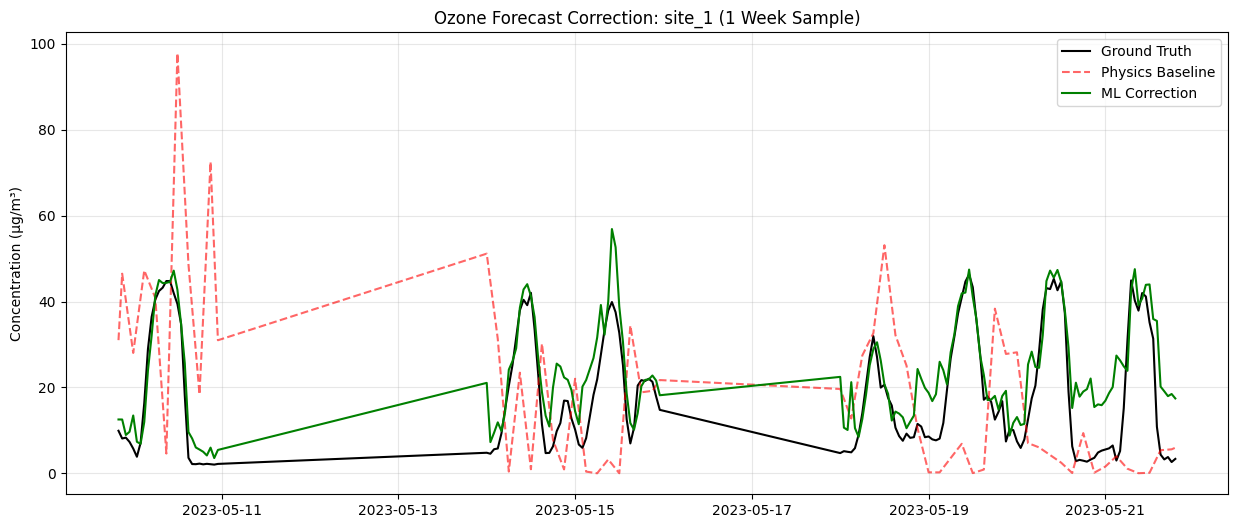

In [7]:
subset = df.iloc[500:668]

plt.figure(figsize=(15, 6))
plt.plot(subset.index, subset['O3_target'], label='Ground Truth', color='black', linewidth=1.5)
plt.plot(subset.index, subset['O3_forecast'], label='Physics Baseline', color='red', linestyle='--', alpha=0.6)
plt.plot(subset.index, subset['O3_target_pred'], label='ML Correction', color='green', linewidth=1.5)
plt.title(f'Ozone Forecast Correction: {site_name} (1 Week Sample)')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
df['baseline_error'] = df['O3_target'] - df['O3_forecast']
df['model_error'] = df['O3_target'] - df['O3_target_pred']

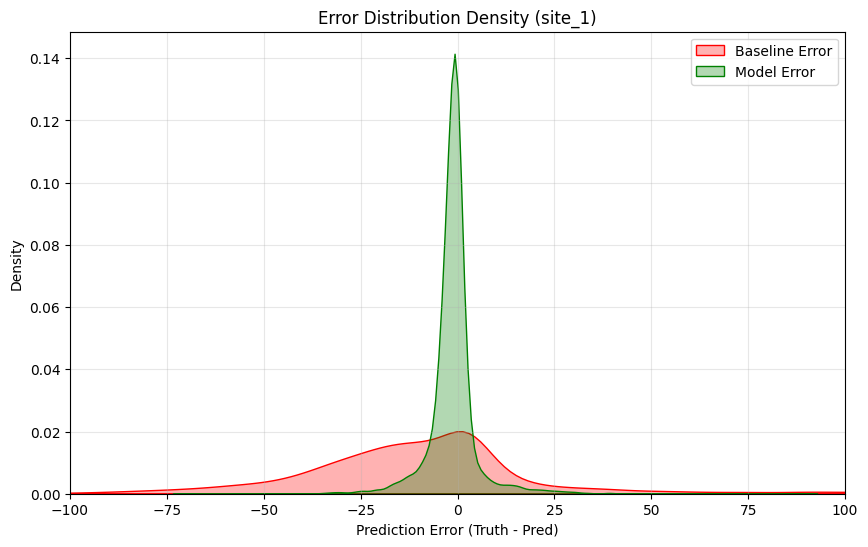

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['baseline_error'], label='Baseline Error', fill=True, color='red', alpha=0.3)
sns.kdeplot(df['model_error'], label='Model Error', fill=True, color='green', alpha=0.3)

plt.title(f'Error Distribution Density ({site_name})')
plt.xlabel('Prediction Error (Truth - Pred)')
plt.xlim(-100, 100) # Limit x-axis to remove extreme outliers for clarity
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

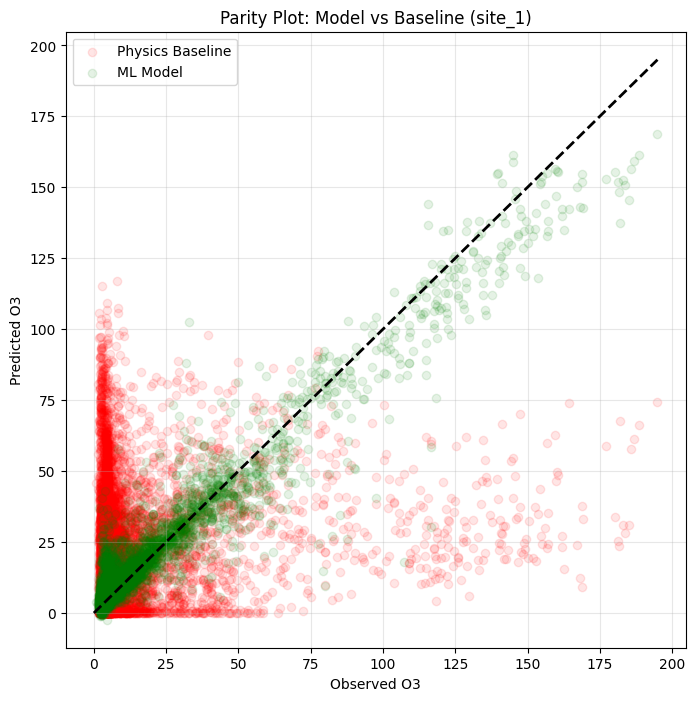

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(df['O3_target'], df['O3_forecast'], alpha=0.1, color='red', label='Physics Baseline')
plt.scatter(df['O3_target'], df['O3_target_pred'], alpha=0.1, color='green', label='ML Model')
max_val = df['O3_target'].max()
plt.plot([0, max_val], [0, max_val], 'k--', linewidth=2)
plt.xlabel('Observed O3')
plt.ylabel('Predicted O3')
plt.legend()
plt.title(f'Parity Plot: Model vs Baseline ({site_name})')
plt.grid(True, alpha=0.3)
plt.show()